In [1]:
%pip install --upgrade pip
%pip install kagglehub



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/retinal-disease-classification")

print("Path to dataset files:", path)

C:\Users\adhik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\adhik\.cache\kagglehub\datasets\andrewmvd\retinal-disease-classification\versions\1


Here we have successfully imported the dataset for retinal disease detection system

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image


In [4]:
# Let us observe the training data
eye_disease_train = pd.read_csv(path + '/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
eye_disease_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:

print("The Columns of the Training Data are "+str(eye_disease_train.columns))
print("The Shape of the Training Data is"+str(eye_disease_train.shape))

The Columns of the Training Data are Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')
The Shape of the Training Data is(1920, 47)


In [6]:
eye_disease_test = pd.read_csv(path + '/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')
eye_disease_test.head()



,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("The Columns of the Testing Data are "+str(eye_disease_test.columns))
print("The Shape of the Testing Data is"+str(eye_disease_test.shape))

The Columns of the Testing Data are Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')
The Shape of the Testing Data is(640, 47)


In [8]:
eye_disease_eval = pd.read_csv(path + '/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')
eye_disease_eval.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print("The Columns of the Evaluation Data are "+str(eye_disease_eval.columns))
print("The Shape of the Evaluation Data is" +str(eye_disease_eval.shape))

The Columns of the Evaluation Data are Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')
The Shape of the Evaluation Data is(640, 47)


---

# Let us Now Observe the Training DataSet and the Corresponding Images Provided

---



Let us first define a function that converts the training , testing and validation dataset's images and its corresponding arrays as a numpy array

In [10]:
TARGET_HEIGHT = 224
TARGET_WIDTH = 224
TARGET_CHANNELS = 3 
def convert_img_to_np(image_directory,dataset):
    dt_imglist = []
    dt_labellist = []
    dataset['ID'] = dataset['ID'].astype(int) 
    for filename in os.listdir(image_directory):
      if filename.endswith('.png'):
        img_id = filename[:-4]
        #print("image id is",img_id)
        #loading the image using Pillow PIL
        img_path = os.path.join(image_directory, filename)
        try:
          img = Image.open(img_path)
          img=img.convert('RGB')
          img = img.resize((TARGET_WIDTH, TARGET_HEIGHT)) 
          #converting the image to numpy array
          img_array = np.array(img)
          if img_array.shape != (TARGET_HEIGHT, TARGET_WIDTH, 3):
            print(f"Skipping '{filename}': Incorrect shape after resize {img_array.shape}")
            continue

        except Exception as e:
          print(f"Skipping '{filename}': Error during image processing: {e}")
          continue

        label = dataset[dataset['ID'] == int(img_id)].iloc[0, 1:].values

        dt_imglist.append(img_array)
        dt_labellist.append(label)
    
    shapes = [img.shape for img in dt_imglist]
    unique_shapes = set(shapes)
    print("The Unique Shapes are"+str(unique_shapes))
    images_np = np.array(dt_imglist, dtype=np.float32)
    labels_np = np.array(dt_labellist, dtype=np.float32)
    print(f"{type(images_np)} {type(labels_np)}")
    return images_np, labels_np

The Training, Testing and Validation DataSet have already been predefined above as [ eye_disease_train, eye_disease_test, eye_disease_eval]
Now lets create the numpy labels and create the directory path for all three datasets

In [11]:
print("--- Loading Training Data ---")
train_images_dir = path + '/Training_Set/Training_Set/Training'
train_images, train_labels = convert_img_to_np(train_images_dir, eye_disease_train)

print("\n--- Loading Validation Data ---")
validation_image_dir = path + '/Evaluation_Set/Evaluation_Set/Validation'
validation_images, validation_labels = convert_img_to_np(validation_image_dir, eye_disease_eval)

print("\n--- Loading Test Data ---")
test_images_dir = path + '/Test_Set/Test_Set/Test'
test_images, test_labels = convert_img_to_np(test_images_dir, eye_disease_test)

--- Loading Training Data ---
The Unique Shapes are{(224, 224, 3)}
<class 'numpy.ndarray'> <class 'numpy.ndarray'>

--- Loading Validation Data ---
The Unique Shapes are{(224, 224, 3)}
<class 'numpy.ndarray'> <class 'numpy.ndarray'>

--- Loading Test Data ---
The Unique Shapes are{(224, 224, 3)}
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Let us confirm the shapes

In [12]:
print("\n--- Final Dataset Shapes (Before Normalization) ---")
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation images shape: {validation_images.shape}")
print(f"Validation labels shape: {validation_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


--- Final Dataset Shapes (Before Normalization) ---
Training images shape: (1920, 224, 224, 3)
Training labels shape: (1920, 46)
Validation images shape: (640, 224, 224, 3)
Validation labels shape: (640, 46)
Test images shape: (640, 224, 224, 3)
Test labels shape: (640, 46)


Now let us import the neccesary dependencies that we might require for our model 

In [13]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input # For custom head
from tensorflow.keras.optimizers import Adam # Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator # if data augmentation is needed 
import matplotlib.pyplot as plt 
from tensorflow.keras.metrics import BinaryAccuracy

for resnet50 architecture we need to normalize the data, so lets normalize all the necessary data, and ensure that they are of float type

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = validation_images / 255.0

#ensuring that the data are of float32 type
train_labels = train_labels.astype(np.float32)
validation_labels = validation_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

For now, let us observe the labels, there are effectively 45 diseases and a single column for the disease risk , let us observe by including the disease risk in the labels to be loaded in the model 

In [16]:
num_disease_labels = train_labels.shape[1]
print(f"Number of disease labels (output classes) for multi-label prediction: {num_disease_labels}")
input_shape = train_images.shape[1:]

Number of disease labels (output classes) for multi-label prediction: 46


Now let us load the pretrained resnet50 model , where we will exclude the top classification layer, this is because we are working with retinal image dataset and resnet50 is a pretrained model that we need to use for our use case

In [17]:
base_model = ResNet50(weights="imagenet",
                      include_top = False, 
                      input_shape=input_shape)

we will freeze the base layers initially to only train the new top layers, preventing pre - trained weights from being updated 


In [18]:
for layer in base_model.layers:
    layer.trainable = False 

#custom classification head 
x= base_model.output #output of the resnet50 base
x= Flatten()(x) #flattening output to feed dense layers

x = Dense(256, activation = 'relu')(x)
x= Dropout(0.5)(x)
x= Dense(128, activation='relu')(x)
x= Dropout(0.5)(x)

for the output layers of the multi disease classification , first we observe num_disease_labels that corresponds to the number of columns in the train_labels, than we use sigmoid activation for multi-label classification as each label is binary 

In [19]:
predictions = Dense(num_disease_labels, activation ='sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)



In [23]:
positive_counts = np.sum(train_labels, axis=0) #sums 1 down to each column for each disease
label_weights = (train_labels.shape[0] / (positive_counts + 1e-5)) / num_disease_labels # 1e-5 to avoid divison by 0
print("\nLabel weights (per disease type):", label_weights)


#calculating single weight and then summing up 
sample_weights = np.sum(train_labels * label_weights, axis=1)

print(f"Sample weights shape: {sample_weights.shape}")
print(f"Sample weights min: {np.min(sample_weights):.4f}, max: {np.max(sample_weights):.4f}, mean: {np.mean(sample_weights):.4f}")


Label weights (per disease type): [2.74780318e-02 1.11008324e-01 4.17391270e-01 1.31669179e-01
 3.02457422e-01 4.13258672e-01 5.71768820e-01 2.24403903e-01
 2.98136449e+00 8.88066411e-01 2.78260684e+00 1.12808430e+00
 1.48011103e-01 1.49068272e+00 6.95651054e+00 2.60869408e+00
 6.42140388e-01 7.19640076e-01 8.34780979e+00 2.45524168e+00
 3.79446316e+00 2.98136449e+00 9.70677197e-01 1.30434728e+00
 2.78260684e+00 1.89723241e+00 3.79446316e+00 6.95651054e+00
 1.39129972e+01 4.17387123e+01 4.17391300e+06 2.08694611e+01
 1.39129972e+01 4.17391300e+06 2.08694611e+01 1.39129972e+01
 1.04347563e+01 8.34780979e+00 1.39129972e+01 4.17387123e+01
 4.17387123e+01 4.17387123e+01 2.08694611e+01 4.17387123e+01
 4.17387123e+01 4.17387123e+01]
Sample weights shape: (1920,)
Sample weights min: 0.0000, max: 45.0322, mean: 0.9565


now before training the model we will perform neccesities like markdowns

In [24]:
THRESHOLD = 0.3
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=[ #explicitly defining the metrics 
                  BinaryAccuracy(name='accuracy', threshold = THRESHOLD), 
                  tf.keras.metrics.Precision(name='precision', thresholds = THRESHOLD), 
                  tf.keras.metrics.Recall(name='recall', thresholds = THRESHOLD)
              ])

**STARTING THE FIRST MODEL TRAINING**

*this was our custom head*

In [25]:
print("\nStarting Initial Model Training...")
history_initial = model.fit(
     train_images,
     train_labels,
     epochs= 7, #starting with few epochs is generally better
     batch_size = 16,
     validation_data= (validation_images, validation_labels),
     sample_weight=sample_weights
)


Starting Initial Model Training...
Epoch 1/7
120/120 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7114 - loss: 1.2409 - precision: 0.0799 - recall: 0.5668 - val_accuracy: 0.9516 - val_loss: 0.1679 - val_precision: 0.4117 - val_recall: 0.4395
Epoch 2/7
120/120 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.7281 - loss: 0.2868 - precision: 0.0876 - recall: 0.6038 - val_accuracy: 0.9719 - val_loss: 0.1618 - val_precision: 0.7906 - val_recall: 0.4220
Epoch 3/7
120/120 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7091 - loss: 0.2396 - precision: 0.0803 - recall: 0.6097 - val_accuracy: 0.9719 - val_loss: 0.1889 - val_precision: 0.7906 - val_recall: 0.4220
Epoch 4/7
120/120 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7333 - loss: 0.2149 - precision: 0.0885 - recall: 0.5945 - val_accuracy: 0.9719 - val_loss: 0.1817 - val_precision: 0.7906 - val_recall: 0.4220
Epoch 5/7
120/120 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8289 - loss: 0.2546 - precision: 0.1416 - recall: 0.6164 -

Let us now try to fine tune our model

In [26]:
print("\nStarting Fine Tuning (i.e unfreezing the base layers for our model) .........")

for layer in base_model.layers:
    if layer.name.startswith('conv5_block'): #similar to unfreezing the last major block of resnet50
        layer.trainable = True
    else:
        layer.trainable = False #keeping ealier layers frozen

#now we can recompule with a very slow learning rate (IMP)
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=[
                  BinaryAccuracy(name='accuracy', threshold = THRESHOLD), 
                  tf.keras.metrics.Precision(name='precision', thresholds = THRESHOLD), 
                  tf.keras.metrics.Recall(name='recall', thresholds = THRESHOLD )
              ])

#here now we continue training for more epochs
history_finetune = model.fit(
    train_images,
    train_labels,
    epochs = 10,
    batch_size = 16,
    validation_data = (validation_images, validation_labels ),
    sample_weight=sample_weights
)


Starting Fine Tuning (i.e unfreezing the base layers for our model) .........
Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9629 - loss: 0.1628 - precision: 0.5471 - recall: 0.4422 - val_accuracy: 0.9719 - val_loss: 0.1414 - val_precision: 0.7906 - val_recall: 0.4220
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9702 - loss: 0.1619 - precision: 0.7325 - recall: 0.4296 - val_accuracy: 0.9719 - val_loss: 0.1394 - val_precision: 0.7906 - val_recall: 0.4220
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9709 - loss: 0.1572 - precision: 0.7355 - recall: 0.4325 - val_accuracy: 0.9719 - val_loss: 0.1405 - val_precision: 0.7906 - val_recall: 0.4220
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9715 - loss: 0.1720 - precision: 0.7470 - recall: 0.4276 - val_accuracy: 0.9719 - val_loss: 0.1404 - val_precision: 0.7906 - val_recall: 0.4220
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9710 - los

Now, lets try to evaluate models final performance 

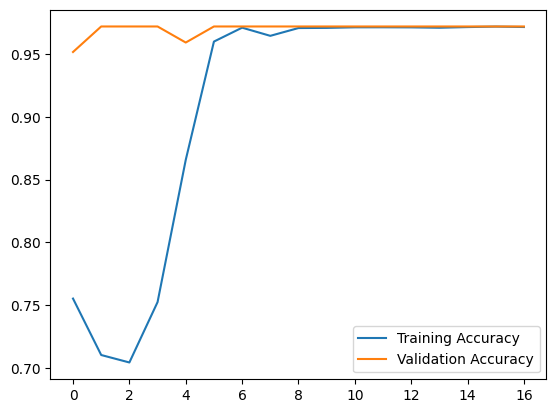

In [27]:
acc = history_initial.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history_initial.history['val_accuracy'] + history_finetune.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

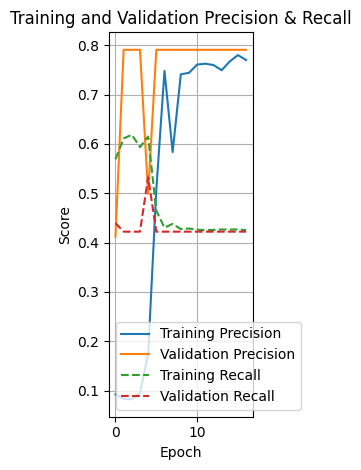

In [30]:
hist_precision = history_initial.history['precision'] + history_finetune.history['precision']
hist_val_precision = history_initial.history['val_precision'] + history_finetune.history['val_precision']
hist_recall = history_initial.history['recall'] + history_finetune.history['recall']
hist_val_recall = history_initial.history['val_recall'] + history_finetune.history['val_recall']
plt.subplot(1, 3, 3) # 1 row, 3 columns, third plot
plt.plot(hist_precision, label='Training Precision')
plt.plot(hist_val_precision, label='Validation Precision')
plt.plot(hist_recall, label='Training Recall', linestyle='--') # Added linestyle for distinction
plt.plot(hist_val_recall, label='Validation Recall', linestyle='--') # Added linestyle
plt.title('Training and Validation Precision & Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)


plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

In [31]:
print("\nEvaluating final model on the test set...")
loss, accuracy, precision, recall = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")


Evaluating final model on the test set...
20/20 - 27s - 1s/step - accuracy: 0.9727 - loss: 0.1373 - precision: 0.7906 - recall: 0.4306
Test Loss: 0.1373
Test Accuracy: 0.9727
Test Precision: 0.7906
Test Recall: 0.4306


BATCH SIZE = 16 , SIGMOID = .3, WEIGHT CLASS ADDED TO IMPROVE RECALL , Till now for loss, we are using binary crossentropy